In [2]:
from __future__ import division
from utils import *
from functions import *
%matplotlib inline
today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)


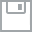
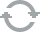
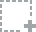
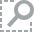
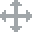
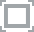
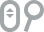
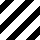
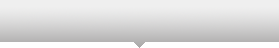
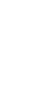
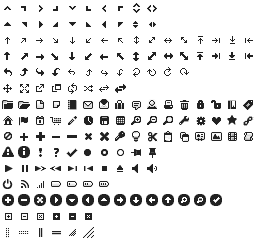
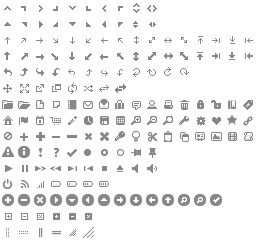
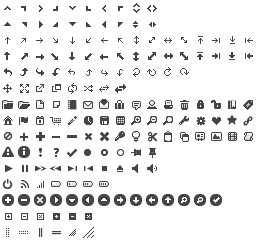
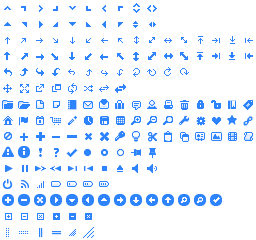
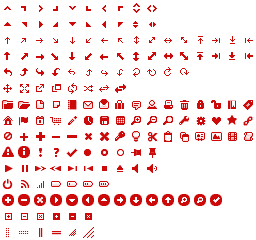
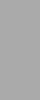
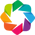
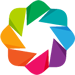

In [3]:
from bokeh.io import output_notebook
output_notebook()

# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH()

In [4]:
# cortex.readSimulationSSP1(N, 0, G,S, d1, d2, d3, before, after,  WII, LTP, LTD, model)

/Users/GP1514/Dropbox/0000 - PhD/figures/20160106/_S-50_N-2500_T-50000_PTSH.pdf
50.0 1000 0.05
can' find:	 /Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/gamma_g-4.8_TImean-50_T-50000_Glob-1_dt-0.25_N-2500_r-0.8_S-5_WII-500_LTD-0.004_LTP-0.02_model-gp-izh_0.txt


TypeError: 'NoneType' object is not iterable

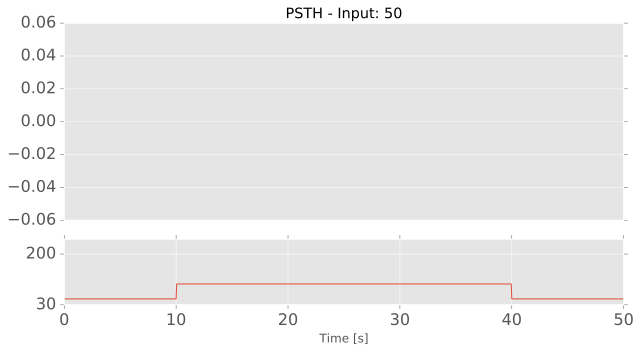

In [5]:
N = 2500
r = 0.8
G = 4.8
dt =0.25
# d1 = 10000
# d2 = 150000
# d3 = 25000
d1 = 10000
d2 = 30000
d3 = 10000
# d1 = 5000
# d2 = 10000
# d3 = 1000
before = d1
after = d2+d3
S = 150
s = 60
WII = 500
it = 80
binsize = 1000
FACT = 1
LTP = 0.02 * FACT
LTD = 0.004 *FACT
model = 'gp-izh'
coeff = 0.09


# cortex.runPSTH(N=N, r=r, G=G,S=S, it=it,binsize=binsize, d1=d1, d2=d2, d3=d3, before=before, after=after,s=s,
#                WII=WII, LTP=LTP, LTD=LTD, model=model)
# h,s,tot, hSSP1 = cortex.readPSTH(N,r, G,S, it,binsize, d1, d2, d3, before, after, s, WII, LTP, LTD, model, coeff, 'IAF')
# gr.plotPTSH(before, after,binsize, h, s, it, DIRECTORY, S, N)
# plt.savefig(DIRECTORY + 'RON.pdf')

ints = []
for S in range(5,15):
    cortex.runPSTH(N=N, r=r, G=G,S=S*10, it=it,binsize=binsize, d1=d1, d2=d2, d3=d3, before=before, after=after,s=s,
               WII=WII, LTP=LTP, LTD=LTD, model=model)
    h,s, total,s2 = cortex.readPSTH(N,r, G,S*10, it,binsize, d1, d2, d3, before, after, s, WII, LTP, LTD, model, coeff)
    gr.plotPTSH(before, after,binsize, h, s, it, DIRECTORY, S*10, N)
#     ints.append(total)
    gr.savePTSH(before, after, h, s, it, DIRECTORY, S*10, N)
    extension = "_S-%d_N-%d_T-%d" % (S, N, before+after)
    plt.savefig(DIRECTORY + extension + '_PTSH.pdf')
    spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation,p,q,lowsp,vm = cortex.readSimulation(N,r, 0, G, S, d1, d2, d3, before, after, WII, LTP, LTD, model)
    plt.plot(gamma)
    plt.save(DIRECTORY + 'gammaPTSH-S%d.pdf'%(S*10))


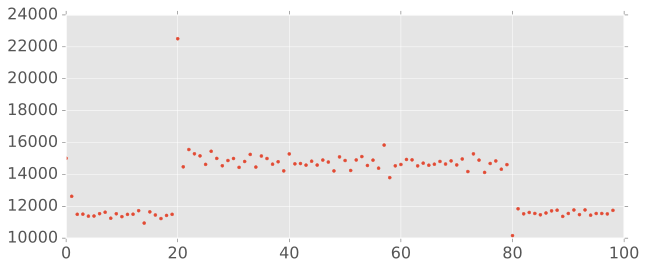

In [13]:
plt.plot(hSSP1,'.')

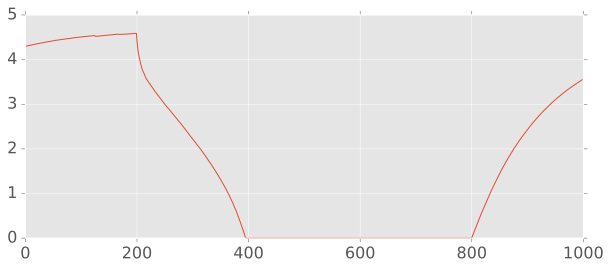

In [28]:
spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation,p,q,lowsp,vm = cortex.readSimulation(N,r, 0, G, S, d1, d2, d3, before, after, WII, LTP, LTD, model)
plt.plot(gamma)
start=250000
gr.plotRasterGPU(spikes_x[start:],spikes_y[start:],"t")

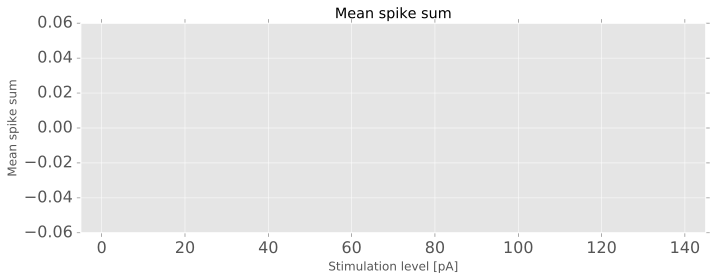

In [19]:
plt.bar(np.arange(-5,(len(ints)-1)*10,10), ints, 10)
plt.title('Mean spike sum')
plt.xlabel('Stimulation level [pA]')
plt.ylabel('Mean spike sum')
plt.xlim([-5,145])
plt.tight_layout()
# plt.savefig(DIRECTORY + '_spikesum.pdf')

TypeError: runSimulation() missing 4 required positional arguments: 's', 'WII', 'tq', and 'thq'

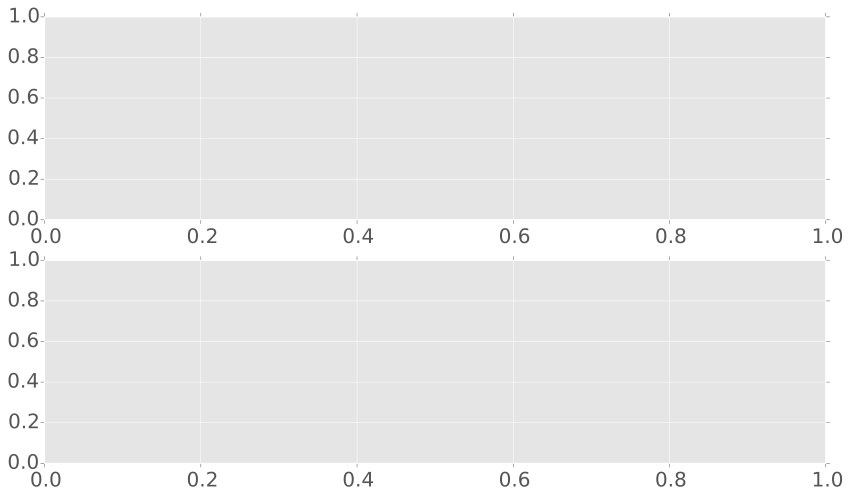

In [6]:
N = 100
ext = 1
G = 3
dt =0.25
d1 = 2000
d2 = 10000
d3 = 10000
before = d1
after = d2+d3
S = 150
it = 8
coeff = -300
Rm = 0.5

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

runSimulation(N,0, G, S, d1, d2, d3, before, after)
spikes_x, spikes_y, gamma, correlation, ssp1, stimulation = readSimulation(N,0, G, S, d1, d2, d3, before, after)
ax.plot(ssp1*10)
# plt.figure()
ron = readoutSpikes(ssp1,Rm, coeff)
ax.plot(ron*120)
# plt.figure()
ax.plot(np.arange(0, len(ron)-1,len(ron)/len(stimulation)),stimulation)
# plt.figure(figsize=(14,4))
listS = [ron]
tot = np.sum(listS, axis=0)
h = getHist(tot,1000)
ax2.bar(np.arange(0,len(ron)/1000, len(ron)/len(h)/1000),h)

<Container object of 44 artists>

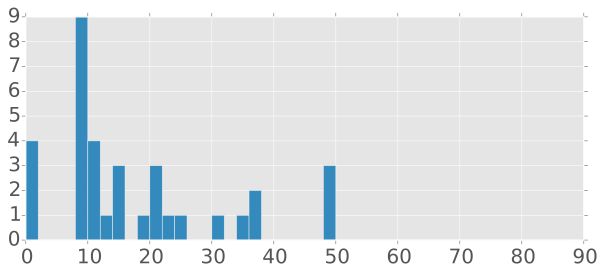

In [47]:
binsize=2000
h = getHist(tot,binsize)
plt.bar(np.arange(0,len(ron)/1000, len(ron)/len(h)/1000),h,  binsize/1000)
# plt.bar(np.arange(0,len(h) * binsize / 1000, binsize/1000),h , binsize/1000)


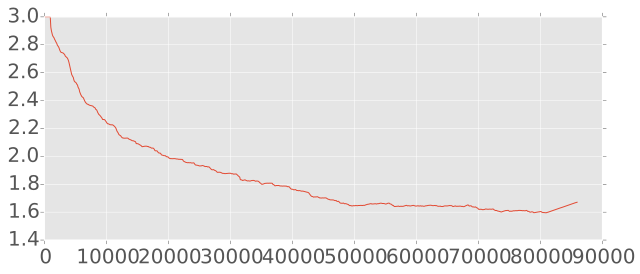

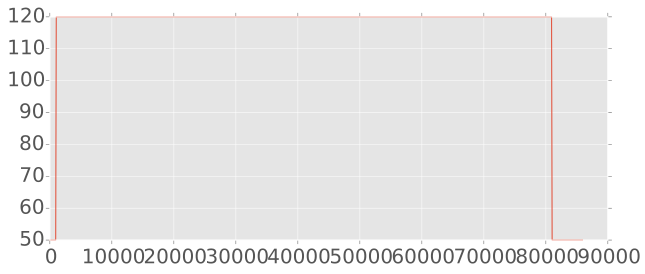

In [48]:
dt = 0.25
T = d1 + d2 + d3
x = np.arange(0,T, T/len(gamma))
x2 = np.arange(0,T, T/len(stimulation))
plt.plot(x, gamma)
plt.figure()
plt.plot(x2, stimulation)
# plt.plot(ssp1)
# plt.plot(ssp2)
# plt.figure()
# plt.plot(spikes_x,spikes_y, '.', markersize=1)


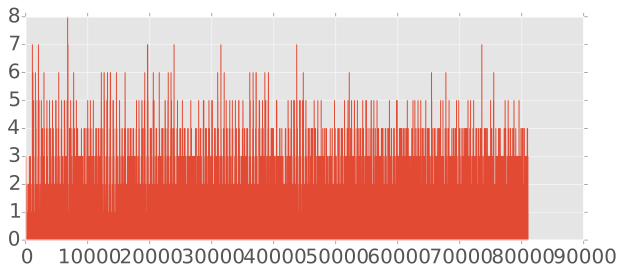

In [36]:
plt.figure()
plt.plot(ssp1)
# plt.figure()
# plt.plot(ssp2)

999
800 800
800 800


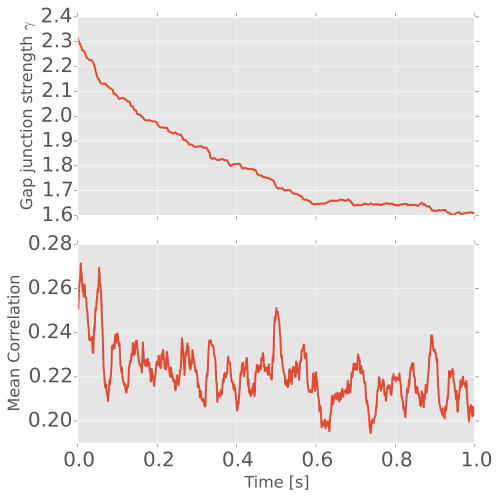

In [34]:
fontsize=16
print len(gamma)
begin = 100
end = 900
Gamma = gamma[begin:end]
Correlation = correlation[begin:end]

# PLOT GAMMA
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(211)
simT = (d1)/len(Gamma)/1000
x= np.arange(0,len(Gamma)*simT,simT)
print len(x), len(Gamma)
ax1.plot( x, Gamma,'-', linewidth=2)
# ax1.set_xticks([])
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel(r'Gap junction strength $\gamma$', fontsize=fontsize)


# # PLOT CORR
ax2  = fig.add_subplot(212)
# x= np.arange(0,Correlation.shape[0]*0.45,0.45)
np.arange(0,Correlation.shape[0]*0.45*400/3000,0.45)
print len(x), len(Correlation)
ax2.set_xlabel('Time [s]', fontsize=fontsize)
ax2.set_ylabel('Mean Correlation', fontsize = fontsize)
ax2.plot(x, np.array(Correlation)*100,'-', linewidth=2)



plt.tight_layout()


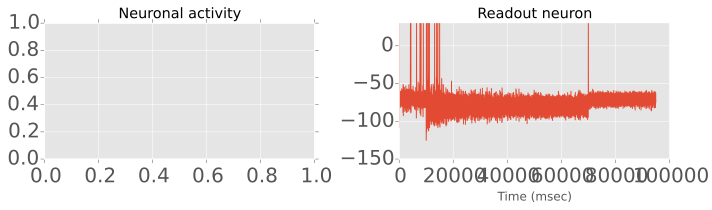

In [27]:
'''
PLOT the rasters and the membrane potential of the readout neuron for both transitions and the end of the simulation
'''

coeff = -300
Rm = 0.1

dur =1000 #duration of periods to plot
# find start and end of periods of interest
t1 = findindex(d1-before, spikes_x)
t2 = findindex(d1+after, spikes_x, t1)
# t3 = findindex(int(2*T/3)-dur, spikes_x, t2)
# t4 = findindex(int(2*T/3)+dur, spikes_x, t3)
# t5 = findindex(int(3*T/3)-2*dur, spikes_x, t4)
t6 = len(spikes_x)

# plot a 3X2 grid
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(122)
ax1 = readoutneuronTRN(ax1, ssp1, Rm, coeff, 1)
ax1.set_title('Readout neuron')
ax4=fig.add_subplot(121)
ax4.set_title('Neuronal activity')
# ax4=plotraster(ax4, spikes_x, spikes_y, t1,t6,dur)


fig.tight_layout()